## 2. Redes Convolucionales sobre imágenes
---
Las redes neuronales hoy en día han sido extendidas a numerosas aplicaciones gracias a la arquitectura definida para cada tipo de problema. Las redes neuronales que aplican la operación de convolución [[3]](#refs) o convoluciones en sus capas son concidas como *CNN* o *ConvNets*, lo cual se especializa en trabajar en datos con forma matricial (ya sea bi-dimensional o tri-dimensional), lo cual se adecúa perfectamente a imágenes (matrices), ya que gracias a su conectividad local se especializan en reconocer patrones sobre los datos de manera espacial, como refleja la siguiente imagen:

<img src="https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png" title="Title text" width="90%" />


En esta actividad trabajará con un extracto bastante pequeño del dataset conocido como **101-Food**[[4]](#refs), el cual consta de mil imágenes pertenecientes a 3 clases (*Hambuger, Hot Dog* y *Pizza*) separados en conjunto de entrenamiento y validación.  
El extracto pequeño del dataset con el que se trabajará deberá ser descargado del siguiente __[link](https://www.dropbox.com/s/56xqazmhbh0doi7/food_data.zip?dl=0)__ a través de Dropbox.

En Machine Learning las redes convolucionales sobre imagenes se utilizan para reducir el tamaño de los atributos de esta sin perder la riqueza de la información que esta posee, es decir, de cada conjunto se posee una especie de dato representante dentro de una vecindad que la caracteriza y con eso se reduce tiempos de ejecución e incluso puede mejorar los resultadosde algoritmos de esta área .


> a) Construya funciones para leer los datos y cargarlos al momento de entrenar (durante cada *epoch*), para ésto utilice *Image Data Generator* de keras.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *
import time
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

C:\Users\kzep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Acá lo que se hace es generar un conjunto de pruebas, entrenamiento (y tambien de validacion por consiguiente) para nuestra red de coonvolucion calculando la cantidad de clases para cada conjuntos

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


trujulear para ver que clases son y describir los parametros

> b) Utilice la red tradicional (*Feed Forward*) entregada en el código para ser entrenada sobre los datos vectorizados, esto es que cada imagen queda representada como un vector gigante, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación.

In [3]:
%%time
ltime=[]
step = []
error = []
best = 99.9
best_step = 0
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) #128
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
for i in range(40):
    error.append(model.evaluate_generator(generator=validation_generator,steps = (i+1))[1])#probar algo distinto de 2
    print("Accuracy validation: ",error[i])
    end = time.time()
    step.append(i+1)
    if error[i]>best:
        best = error[i]
        best_step = i+1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67500)             270000    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               17280256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total para

Para este problema, como los datos son generados aleatoriamente, también el gráfico cambiará y en partícular los pasos necesarios para alcanzar el máximo.

Text(0.5,1,'Accuracy vs steps')

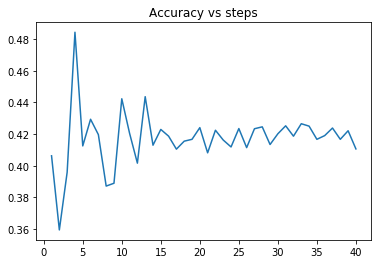

In [4]:
plt.plot(step,error)
plt.title("Accuracy vs steps")

Se muestra el máximo global de la cantidad de pasos considerados, note que a partir de 40 el valor se empieza a estabilizar.

In [5]:
print("Mejor accuracy; ",best,"con ",best_step,"pasos")

Mejor accuracy;  99.9 con  0 pasos


Ahora precargaremos el conjunto con un número fijo de pasos (7) para continuar con el informe. No se utilizará el máximo pues es el valor que puede ser más sensible a overfitting.

la probabilidad converge a 50 es rara, ver pq . estudiar la composición

In [6]:
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) #128
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

error.append(model.evaluate_generator(generator=validation_generator,steps = 7 )[1])#probar algo distinto de 2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 67500)             270000    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               17280256  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total para

> c) Utilice la red convolucional (**CNN**) entregada en el código para ser entrenada sobre los datos brutos, matrices RGB de píxeles, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación. Compare.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
__________

In [ ]:
step = []
error = []
best = 99.9
best_step = 0

for i in range(40):
    error.append(model.evaluate_generator(generator=validation_generator,steps = (i+1))[1])#probar algo distinto de 2
    print("Accuracy validation: ",error[i])
    end = time.time()
    step.append(i+1)
    if error[i]>best:
        best = error[i]
        best_step = i+1

In [ ]:
plt.plot(step,error)
plt.title("Accuracy vs steps")

In [ ]:
print("Mejor accuracy; ",best,"con ",best_step,"pasos")

Finalmente la red combucional tuvo mejores resultados que usando feed foward, pero con la diferencia que el máximo es más grande aún.

> d) Genere un conjunto datos con incorrecta etiquetación de manera manual y vea si el modelo convolucional se sigue comportando de la misma manera. Para esto tome 100 imágenes aleatorias de entrenamiento de la carpeta *hot dog* y 100 imágenes aleatorias de entrenamiento de la carpeta *hamburger* e intercambielas, sin manipular las imágenes de la carpeta *pizza* y con el conjunto de validación intacto. Genere las matrices de confusión en el conjunto de validación para visualizar cómo afectó al modelo la corrupción realizada a los datos.

In [ ]:
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)

In [ ]:
print(confusion_matrix)